# Predicting Time Series ? Predicting Future

# What Is Time Series?

* Variable — anything that changes over time
* Time periods — Can be daily, weekly, monthly, yearly etc
* Variable Behaviour — Quantifiable value

## Past Is Important
**Most time series data is dependent on its past values. Recent past values are good indicators of a variable’s behaviour.**

#### Now let’s consider the effect of Friday’s price on Sunday’s price
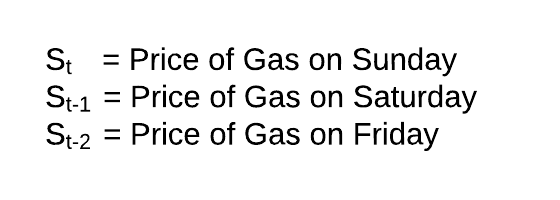

### Role Of Lag Operator
**Lag operator enables models to quantify how past, present and future values are linked to each other.**


**For example, let’s assume we are recording London’s daily temperature and want to build a model that forecasts temperature. There is higher probability that the temperature tomorrow will be similar to what it is today. It is unlikely to snow tomorrow if it is melting hot today.**

## Past data can be a good indicator of future data

# Linear Vs Non-Linear Time Series
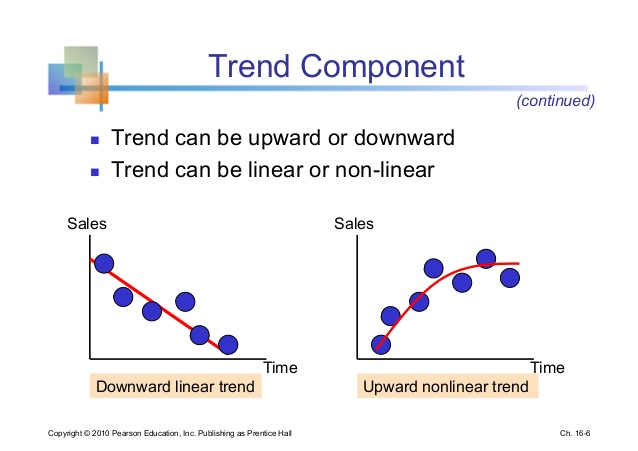

#### Deterministic Vs Non-Deterministic Time Series
**Time series can be deterministic or non-deterministic in nature.
Deterministic time series always behave in an expected manner where as non-deterministic time series is stochastic or random in nature.**

## If a time series mean, variance and covariance with past and future values do not change over time then the model is known to be covariance stationary.

## What makes Time series Stationary

1. Constant Mean
2. Constant Variance
3. Constant Covariance


Covariance is calculated by multiplying Correlation of assets to the Standard Deviation of assets.

# Trend
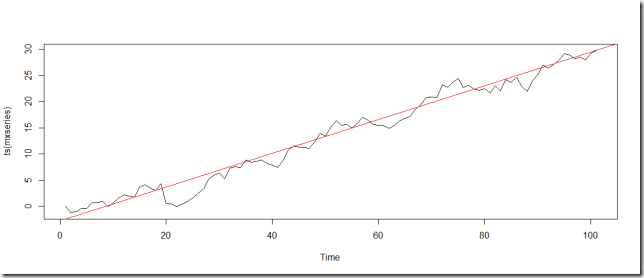

# Seasonality
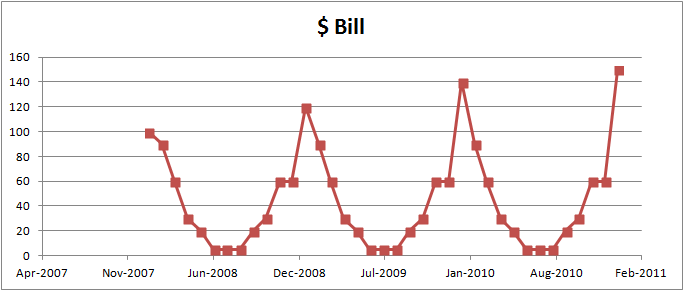

# Autocorrelation

#### Informally, autocorrelation is the similarity between observations as a function of the time lag between them.

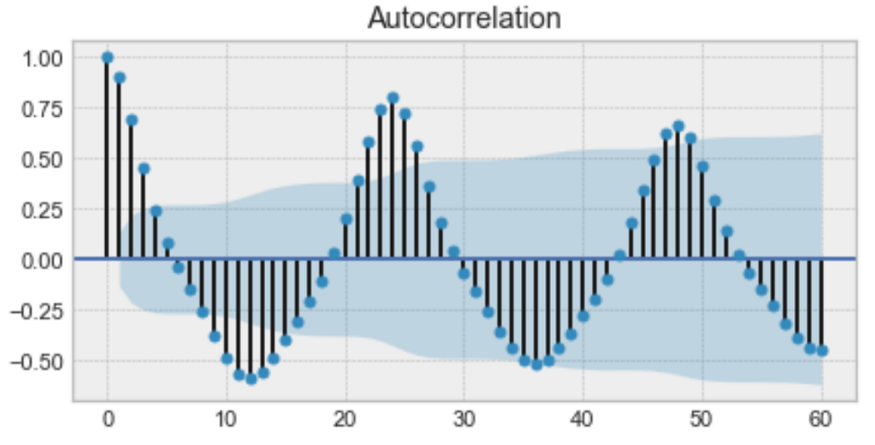


### Above is an example of an autocorrelation plot. Looking closely, you realize that the first value and the 24th value have a high autocorrelation. Similarly, the 12th and 36th observations are highly correlated. This means that we will find a very similar value at every 24 unit of time.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_csv('/kaggle/input/time-series-starter-dataset/Month_Value_1.csv')
data.head()
data.dropna(inplace=True)
data

In [ ]:
data.info()

In [ ]:
data['Period'].astype('datetime64[ns]')

In [ ]:
data['Period'] = pd.to_datetime(data['Period'],format='%d.%m.%Y')

In [ ]:
data.info()

In [ ]:
data['year']=data['Period'].dt.year 
data['month']=data['Period'].dt.month 
data['day']=data['Period'].dt.day

data['dayofweek_num']=data['Period'].dt.dayofweek  


data.head(18)

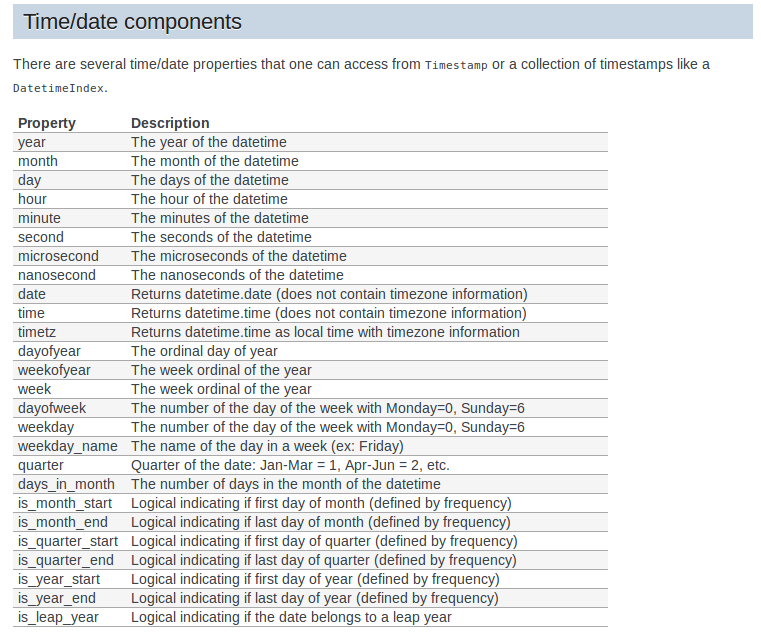

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(15,5)})
import seaborn as sns

# plt.figure(figsize=(15,5))
# sns.distplot(data['Sales_quantity'])
plt.plot(data.Sales_quantity)

## Rolling Window

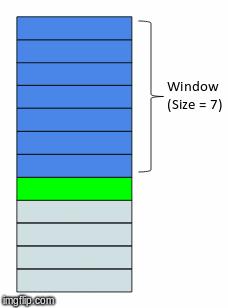

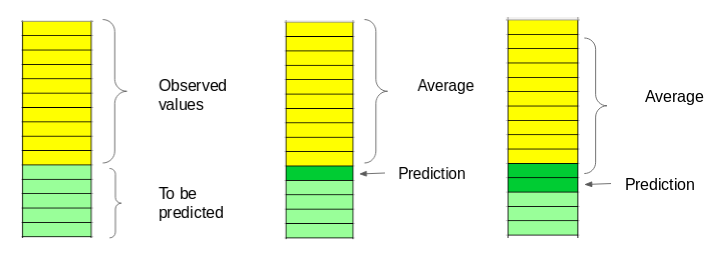

# Basic Structure of ARIMA Model

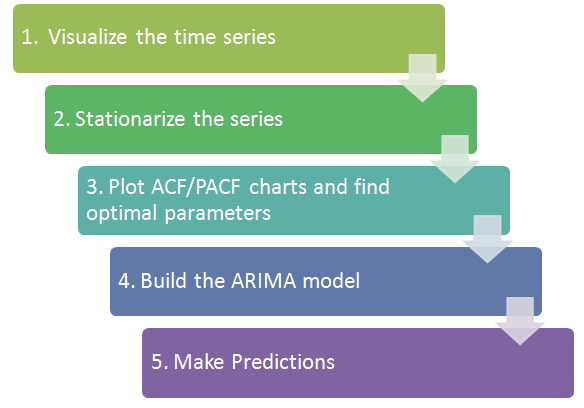

In [ ]:
data['rolling_mean'] = data.Sales_quantity.rolling( window=2).mean()
data['rolling_mean6'] = data.Sales_quantity.rolling( window=6).mean()
plt.plot(data.Sales_quantity, label='original')
plt.plot(data.rolling_mean, label = 'window =2')
plt.plot(data.rolling_mean6, label = 'window =6')
plt.legend(loc='best')


In [ ]:
data.head(17)

In [ ]:
data.index = data.Period

## ARIMA is a very popular statistical method for time series forecasting. ARIMA stands for Auto-Regressive Integrated Moving Averages. ARIMA models work on the following assumptions –

### The data series is stationary, which means that the mean and variance should not vary with time. A series can be made stationary by using log transformation or differencing the series.
#### The data provided as input must be a univariate series, since arima uses the past values to predict the future values.
#### ARIMA has three components – AR (autoregressive term), I (differencing term) and MA (moving average term). Let us understand each of these components –

# AR term refers to the past values used for forecasting the next value. The AR term is defined by the parameter ‘p’ in arima. The value of ‘p’ is determined using the PACF plot.

# MA term is used to defines number of past forecast errors used to predict the future values. The parameter ‘q’ in arima represents the MA term. ACF plot is used to identify the correct ‘q’ value.

# Order of differencing  specifies the number of times the differencing operation is performed on series to make it stationary. Test like ADF and KPSS can be used to determine whether the series is stationary and help in identifying the d value.

## Moving Average (MA)
#### Moving Average (MA) model works by analysing how wrong you were in predicting values for the previous time-periods to make a better estimate for the current time-period.

### Auto Regressive (AR)
### Auto Regressive (AR) model is a specific type of regression model where, the dependent variable depends on past values of itself.

### ADF (Augmented Dickey Fuller) Test  

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Sales_quantity, autolag='AIC')

In [ ]:
dftest

In [ ]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

### Differencing
In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

yt‘ = yt – y(t-1)

In [ ]:
data

In [ ]:
# To remove Trend
data['#Sales_quantity'] = data['Sales_quantity'] - data['Sales_quantity'].shift(1)
data['#Sales_quantity'].dropna(inplace=True)
data['#Sales_quantity'].dropna().plot()

In [ ]:
dftest = adfuller(data['#Sales_quantity'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = np.round(value, 1)
print (dfoutput)

dftest[1].round(4)

In [ ]:
# To remove Seasonality
data['#Sales_quantity_sea'] = data['Sales_quantity'] - data['Sales_quantity'].shift(12)
data['#Sales_quantity_sea'].dropna(inplace=True)
data['#Sales_quantity_sea'].dropna().plot()

In [ ]:
dftest = adfuller(data['#Sales_quantity_sea'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

In [ ]:
# Log Transformation
data['log'] = np.log(data.Sales_quantity)

In [ ]:
dftest = adfuller(data['log'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

In [ ]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(data.Sales_quantity,period=12,model="multiplicative")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

In [ ]:
res = sm.tsa.seasonal_decompose(data.Sales_quantity,period=12,model="additive")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

# If it is a time series you are to analyze, the traditional components are the trend, the seasonal component, the cyclical movement and the irregular component. If seasonality tends to be constant over time, the additive model is suggestive. If however the seasonality seems to increase with time then the multiplicative model is suggestive. Use addition or subtraction in an additive model where multiplication or division, respectively, is applicable in a multiplicative model. That is the difference.

# AR   PACF  'P'  value

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(data['log'], lags=12, method='ols')
plt.show()

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data['log'], nlags=12)
lag_pacf = pacf(data['log'], nlags=12, method='ols')


plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data['log'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data['log'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

## p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

# MA ACF 'Q' value

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(data['log'], lags=12)
plt.show()

In [ ]:

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data['log'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data['log'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

## q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(data['log'], order=(2,2, 2))  
results_AR = model.fit(disp=1)  


In [ ]:
results_AR.fittedvalues

In [ ]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff.head()
(predictions_ARIMA_diff)

In [ ]:
# predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
# predictions_ARIMA_diff_cumsum.head()
# (predictions_ARIMA_diff_cumsum)

In [ ]:
predictions_ARIMA_log = pd.Series(data['log'].iloc[0], index=data.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head(49)

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data['Sales_quantity'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data['Sales_quantity'])**2)/len(data['Sales_quantity'])))

In [ ]:
x = results_AR.forecast(steps=10)

In [ ]:
x = np.exp(x[0])
x

In [ ]:
rng = pd.date_range('2020-04-01', periods=10, freq='M')

In [ ]:
rng = pd.DataFrame(rng, columns=['Dates'])

In [ ]:
rng

In [ ]:
rng['future'] = x
rng.index = rng.Dates

In [ ]:
plt.plot(data['Sales_quantity'], label='original')
plt.plot(predictions_ARIMA, label='fitted Values')
plt.plot(rng['future'], label='Future Values')
plt.legend(loc='best')
